# 第7回のコード

Juliaの実装を紹介する。

なおこのコードの実行の前に以下のパッケージをインストールする必要がある。

```
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
```

区間 $[0,1]$ 上の複素数値偏微分方程式

$$
    u_t = u_{xx} + u^2
$$

を考える。この平衡解は

$$
    u_{xx} + u^2 = 0, \quad u(t,x) = u(t,x+1)
$$

をみたす。フーリエ級数

$$
    u(x) = \sum_{k\in\mathbb{Z}} a_k e^{ik\omega x}
$$

を代入すると

$$
-k^2\omega^2a_k+\left(a^2 \right)_k = 0,\quad \omega=2\pi.
$$

いま $\mu_k := -k^2\omega^2$　とし

$$
    f_k(a) := \mu_k a_k+\left(a^2 \right)_k  = 0,\quad k\in\mathbb{Z}
$$

とする。さらに簡単のためにコサイン対称性 $a_{-k}=a_k$ を課す。これは斉次ノイマン境界条件に対応する。

In [1]:
include("Steady_States.jl")
# Vector field
function F_steady_states(a) # Input: cosine Fourier
    N = length(a)-1 # maximum wave #
    omega = 2*pi
    k = (0:N)
    a_ext = [reverse(a[2:end]); a] # convert to two-sided (full) Fourier
    a2 = quadratic(a_ext,a_ext); 
    return -k.^2*omega^2 .* a + a2[N+1:end]
end

F_steady_states (generic function with 1 method)

In [2]:
# Jacobian matrix
function DF_steady_states(a)
    N = length(a)-1
    omega = 2*pi
    a = [reverse(a[2:end]);a;zeros(N)] # convert to two-sided (full) Fourier
    DF_nonlinear = zeros(ComplexF64,N+1,N+1)
    DF_nonlinear[:,1] = 2*a[N+1:2*N+1]
    n = (0:N)
    for ell = 1:N
        DF_nonlinear[:,ell+1] = 2*(a[n.+(-ell+N+1)]+a[n.+(ell+N+1)])
    end 
    return diagm(-(n.^2)*omega^2) + DF_nonlinear
end

DF_steady_states (generic function with 1 method)

In [3]:
# Newton-iteration
function newton(a)
    tol = 5e-10; # tolerance for Newton's method
    F = F_steady_states(a)
    nF = norm(F,1)
    println("Before iteration: $(nF)")
    k=0
    while (k<=60) && (nF > tol)
        DF = DF_steady_states(a)
        a = a - DF\F
        F = F_steady_states(a)
        nF = norm(F,1)
        println("After $(k+1) th iteration: $(nF)")
        k = k+1
    end
    return a
end

newton (generic function with 1 method)

Before iteration: 7.04726562246926e-13


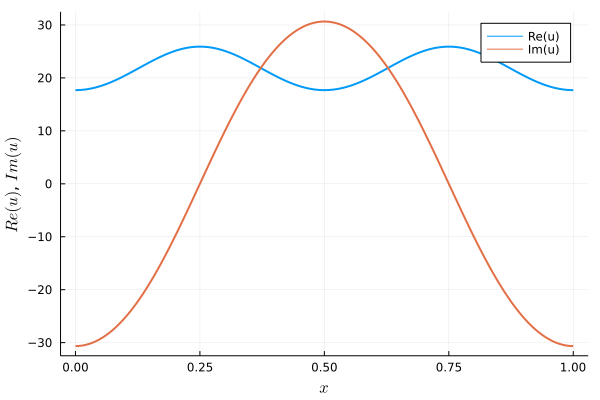

In [4]:
a0 = [21.76559237081062 + 1.9383270997089583e-15im,  -8.239872952409614e-17 - 15.52560346219531im,     -2.0529575661128727 - 3.458412655394703e-17im,  -1.2754497393195608e-16 + 0.20271153310873213im,    0.017792322732511922 - 1.5458169995924245e-17im, -1.4548095422091757e-17 - 0.001464057311108157im, -0.00011565242433419476 - 4.1824736389430116e-18im, -1.9267431864170404e-17 + 8.882126364740443e-6im,    6.682275005228726e-7 - 7.226007071519279e-21im,  1.1439108917991743e-18 - 4.948676958952778e-8im,  -3.6217002459190806e-9 - 2.6489251128693893e-18im];
a = newton(a0)
plot_periodic_complex(a)

In [5]:
# n = 31
# X1_re = zeros(n)
# X1_re[1:2:end] .= 10
# X1_im = zeros(n)
# X1_im[2:2:end] .= 10
# a0 = X1_re + X1_im*im
# # iterate newton method
# a = newton(a0)
# plot_periodic_complex(a)